## Write a Python program to perform Linear and Circular Convolution between two sequences and plot the results
### Given sequences:  
### $ x(n) = \{1,\, 2,\, 3,\, 4\}, \quad h(n) = \{1,\, -1,\, 2\} $


In [1]:
import numpy as np 
import matplotlib.pyplot as plt

### Define the Input and Impulse Response Sequences

In [2]:
x = np.array([1, 2, 3, 4])
h = np.array([1, -1, 2])

### Compute linear convolution


Linear convolution of two sequences $x(n)$ and $h(n)$ gives the system’s output when the input is $x(n)$.

The length of the output sequence is given by:

$$
L = L_x + L_h - 1
$$

It represents the actual **time-domain response** of the system.


In [3]:
y_linear = np.convolve(x, h)
print("Linear Convolution:", y_linear)

Linear Convolution: [1 1 3 5 2 8]


### Perform Circular Convolution using Add-Around Method

In this method:

1. First, compute the **linear convolution** of the two sequences.  
2. Then, “wrap around” or **fold** the extra values that extend beyond the sequence length  
   $N = \max(L_x, L_h)$,  
   by adding them back to the beginning of the result.

This process converts the linear convolution output into the **circular convolution** equivalent.


In [4]:
N = max(len(x), len(h))
y_circular = np.zeros(N)

for i in range(len(y_linear)):
    y_circular[i % N] += y_linear[i]

print("Circular Convolution:", y_circular)


Circular Convolution: [3. 9. 3. 5.]


### Plot All Signals

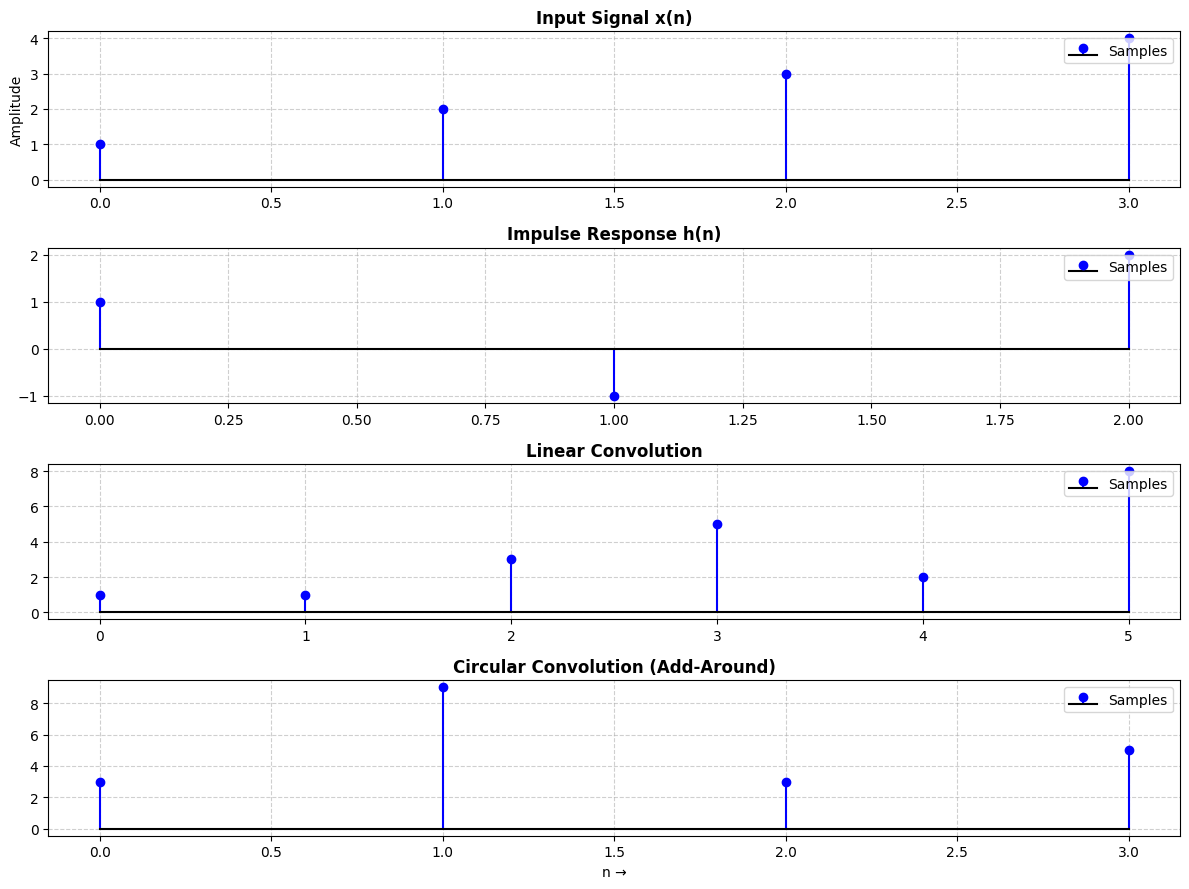

Linear Convolution: [1 1 3 5 2 8]
Circular Convolution: [3. 9. 3. 5.]


In [7]:
# Plot configuration
fig, axs = plt.subplots(4, 1, figsize=(12, 9))
signals = [
    (x, np.arange(len(x)), "Input Signal x(n)", "Amplitude", ""),
    (h, np.arange(len(h)), "Impulse Response h(n)", "", ""),
    (y_linear, np.arange(len(y_linear)), "Linear Convolution", "", ""),
    (y_circular, np.arange(len(y_circular)), "Circular Convolution (Add-Around)", "", "n →")
]

# Discrete-time plotting (modern compatible)
for ax, (signal, n, title, ylabel, xlabel) in zip(axs, signals):
    markerline, stemlines, baseline = ax.stem(n, signal, linefmt='b-', markerfmt='bo', basefmt='k-')
    plt.setp(markerline, markersize=6)
    plt.setp(stemlines, linewidth=1.5)
    ax.set_title(title, fontsize=12, fontweight='bold')
    if ylabel:
        ax.set_ylabel(ylabel)
    if xlabel:
        ax.set_xlabel(xlabel)
    ax.legend(["Samples"], loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print values
print("Linear Convolution:", y_linear)
print("Circular Convolution:", y_circular)
